## Laptop Prices Dataset

### Группа

* 22П-3
### Команда

* Рахмаев Данил
* Михайлов Евгений

In [182]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [184]:
df_laptopPrice = pd.read_csv("laptopPrice.csv")

In [186]:
df_laptopPrice.head(10)

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0
5,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,22990,3 stars,0,0
6,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,32-bit,0 GB,Casual,No warranty,No,No,21990,3 stars,31,3
7,ASUS,Intel,Core i5,10th,8 GB,DDR4,0 GB,1024 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,58799,3 stars,0,0
8,Lenovo,Intel,Core i5,10th,4 GB,DDR4,0 GB,1024 GB,Windows,32-bit,0 GB,Casual,No warranty,No,No,49999,3 stars,0,0
9,acer,AMD,Ryzen 5,10th,4 GB,DDR4,0 GB,512 GB,Windows,32-bit,4 GB,Casual,No warranty,No,No,59990,4 stars,1946,240


#### Описание данных


* brand - Торговая марка или производитель ноутбука.
* processor_brand - Производитель процессора.
* processor_name - Название или модель процессора.
* processor_gnrtn - Поколение процессора.
* ram_gb - Объем оперативной памяти.
* ram_type - Тип оперативной памяти.
* ssd - Объем SSD.
* hdd - Объем HDD.
* os - Операционная система ноутбука.
* os_bit - Разрядность операционной системы .
* graphic_card_gb - Объем памяти видеокарты.
* weight - Вес ноутбука.
* warranty - Условия или срок гарантии на ноутбук.
* Touchscreen - Наличие сенсорного экрана.
* msoffice - Наличие установленного пакета Microsoft Office.
* Price - Цена устройства.
* rating - Рейтинг ноутбука.
* Number of Ratings - Общее количество оставленных пользователями рейтингов.
* Number of Reviews - Общее количество текстовых отзывов о ноутбуке.
* Целевой признак - Price

### Разведочный анализ данных

In [190]:
df_laptopPrice.shape

(823, 19)

In [191]:
df_laptopPrice.dtypes

brand                object
processor_brand      object
processor_name       object
processor_gnrtn      object
ram_gb               object
ram_type             object
ssd                  object
hdd                  object
os                   object
os_bit               object
graphic_card_gb      object
weight               object
warranty             object
Touchscreen          object
msoffice             object
Price                 int64
rating               object
Number of Ratings     int64
Number of Reviews     int64
dtype: object

In [192]:
df_laptopPrice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   brand              823 non-null    object
 1   processor_brand    823 non-null    object
 2   processor_name     823 non-null    object
 3   processor_gnrtn    823 non-null    object
 4   ram_gb             823 non-null    object
 5   ram_type           823 non-null    object
 6   ssd                823 non-null    object
 7   hdd                823 non-null    object
 8   os                 823 non-null    object
 9   os_bit             823 non-null    object
 10  graphic_card_gb    823 non-null    object
 11  weight             823 non-null    object
 12  warranty           823 non-null    object
 13  Touchscreen        823 non-null    object
 14  msoffice           823 non-null    object
 15  Price              823 non-null    int64 
 16  rating             823 non-null    object
 1

In [194]:
print(df_laptopPrice["brand"].value_counts(),"\n",df_laptopPrice["ram_gb"].value_counts(),"\n",df_laptopPrice["processor_name"].value_counts())

brand
ASUS      249
DELL      151
Lenovo    144
HP        136
acer       51
MSI        50
APPLE      28
Avita      14
Name: count, dtype: int64 
 ram_gb
8 GB     418
4 GB     226
16 GB    177
32 GB      2
Name: count, dtype: int64 
 processor_name
Core i5         290
Core i3         164
Core i7         110
Ryzen 5          82
Ryzen 7          56
Ryzen 3          26
Ryzen 9          26
Celeron Dual     24
M1               24
Pentium Quad     13
Core i9           8
Name: count, dtype: int64


In [196]:
for col in df_laptopPrice.columns:
    print('Кол-во пропусков в колонке %s = %d' % (col, df_laptopPrice[col].isna().sum()))

Кол-во пропусков в колонке brand = 0
Кол-во пропусков в колонке processor_brand = 0
Кол-во пропусков в колонке processor_name = 0
Кол-во пропусков в колонке processor_gnrtn = 0
Кол-во пропусков в колонке ram_gb = 0
Кол-во пропусков в колонке ram_type = 0
Кол-во пропусков в колонке ssd = 0
Кол-во пропусков в колонке hdd = 0
Кол-во пропусков в колонке os = 0
Кол-во пропусков в колонке os_bit = 0
Кол-во пропусков в колонке graphic_card_gb = 0
Кол-во пропусков в колонке weight = 0
Кол-во пропусков в колонке warranty = 0
Кол-во пропусков в колонке Touchscreen = 0
Кол-во пропусков в колонке msoffice = 0
Кол-во пропусков в колонке Price = 0
Кол-во пропусков в колонке rating = 0
Кол-во пропусков в колонке Number of Ratings = 0
Кол-во пропусков в колонке Number of Reviews = 0


In [199]:
df_laptopPrice.describe()

,Price,Number of Ratings,Number of Reviews
count,823.000000,823.000000,823.000000
mean,76745.177400,315.301337,37.609964
std,45101.790525,1047.382654,121.728017
min,16990.000000,0.000000,0.000000
25%,46095.000000,0.000000,0.000000
50%,64990.000000,17.000000,2.000000
75%,89636.000000,139.500000,18.000000
max,441990.000000,15279.000000,1947.000000


In [200]:
for column in df_laptopPrice.columns:
    unique_values = df_laptopPrice[column].unique()
    print(f"Количество уникальных значений в '{column}': {len(unique_values)}")

Количество уникальных значений в 'brand': 8
Количество уникальных значений в 'processor_brand': 3
Количество уникальных значений в 'processor_name': 11
Количество уникальных значений в 'processor_gnrtn': 8
Количество уникальных значений в 'ram_gb': 4
Количество уникальных значений в 'ram_type': 6
Количество уникальных значений в 'ssd': 7
Количество уникальных значений в 'hdd': 4
Количество уникальных значений в 'os': 3
Количество уникальных значений в 'os_bit': 2
Количество уникальных значений в 'graphic_card_gb': 5
Количество уникальных значений в 'weight': 3
Количество уникальных значений в 'warranty': 4
Количество уникальных значений в 'Touchscreen': 2
Количество уникальных значений в 'msoffice': 2
Количество уникальных значений в 'Price': 405
Количество уникальных значений в 'rating': 5
Количество уникальных значений в 'Number of Ratings': 282
Количество уникальных значений в 'Number of Reviews': 135


In [202]:
from sklearn.preprocessing import LabelEncoder

In [204]:
label_encoders = {}
for column in df_laptopPrice.columns:
    if df_laptopPrice[column].dtype == 'object':
        le = LabelEncoder()
        df_laptopPrice[column] = le.fit_transform(df_laptopPrice[column])
        label_encoders[column] = le  

In [206]:
df_laptopPrice.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,1,1,1,0,2,1,0,1,2,1,0,0,3,0,0,34649,1,3,0
1,5,1,1,0,2,1,0,1,2,1,0,0,3,0,0,38999,2,65,5
2,5,1,1,0,2,1,0,1,2,1,0,0,3,0,0,39999,2,8,1
3,1,1,2,0,3,1,6,0,2,0,1,0,3,0,0,69990,2,0,0
4,1,1,0,7,2,1,0,3,2,1,0,0,3,0,0,26990,2,0,0


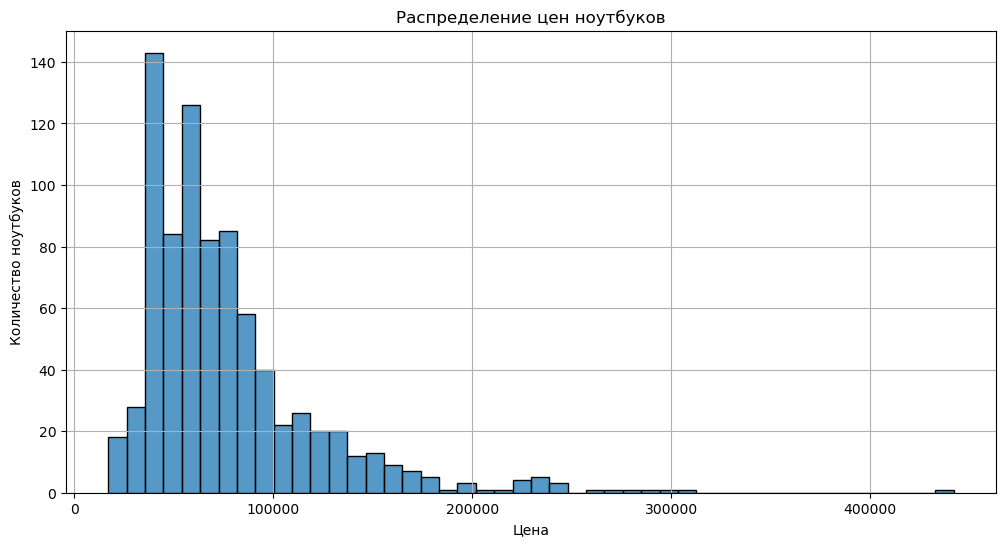

In [207]:
plt.figure(figsize=(12, 6))
sns.histplot(df_laptopPrice['Price'])
plt.title('Распределение цен ноутбуков')
plt.xlabel('Цена')
plt.ylabel('Количество ноутбуков')
plt.grid()
plt.show()

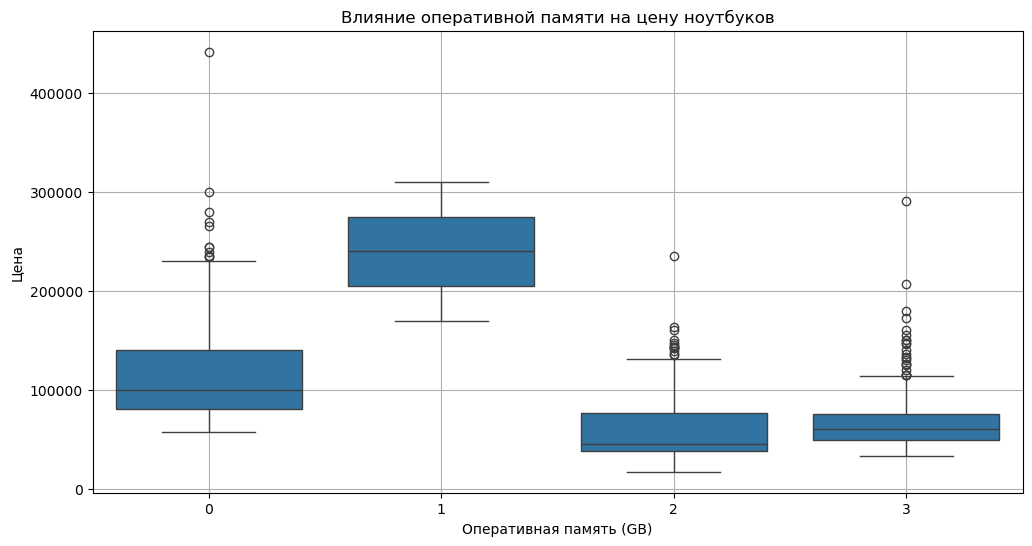

In [210]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='ram_gb', y='Price', data=df_laptopPrice)
plt.title('Влияние оперативной памяти на цену ноутбуков')
plt.xlabel('Оперативная память (GB)')
plt.ylabel('Цена')
plt.grid()
plt.show()

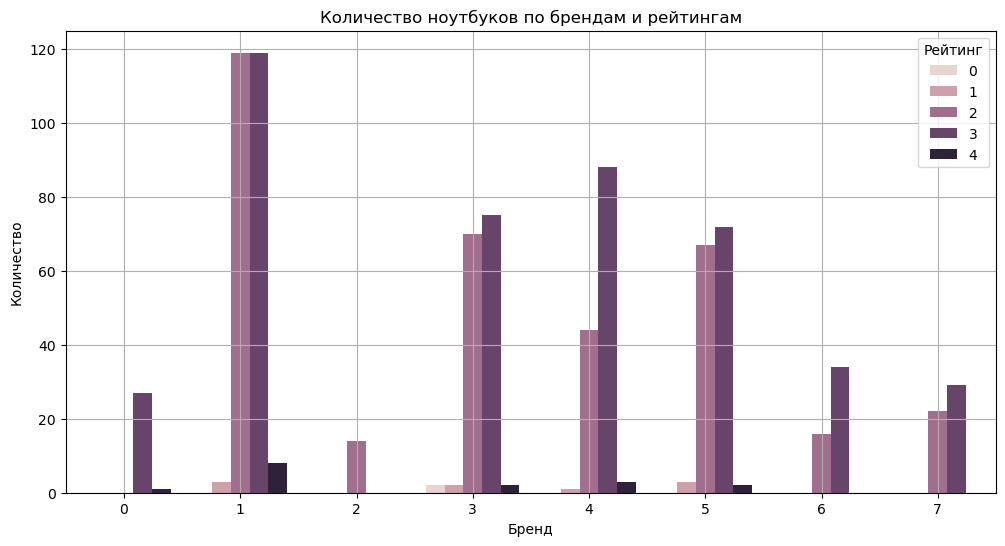

In [213]:
plt.figure(figsize=(12, 6))
sns.countplot(x='brand', hue='rating', data=df_laptopPrice)
plt.title('Количество ноутбуков по брендам и рейтингам')
plt.xlabel('Бренд')
plt.ylabel('Количество')
plt.legend(title='Рейтинг')
plt.grid()
plt.show()

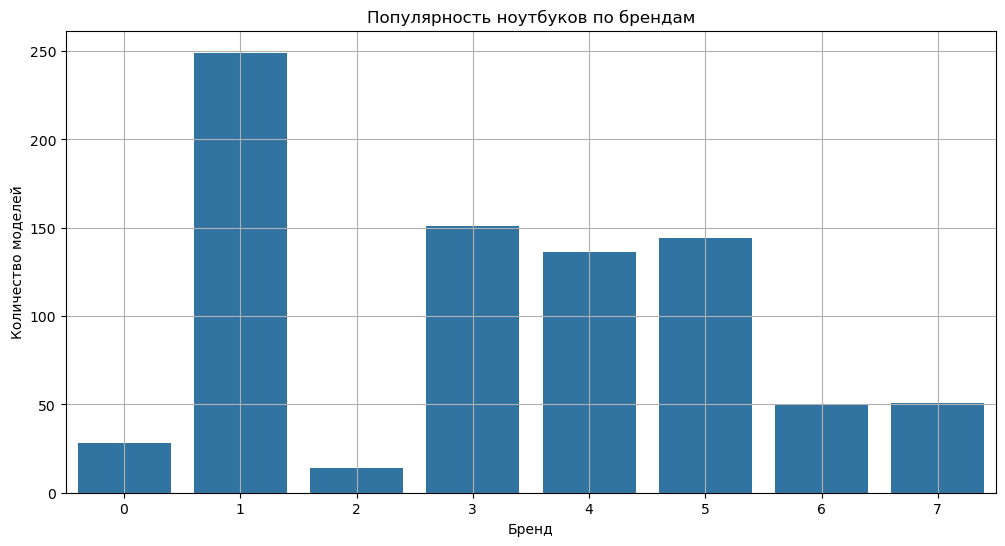

In [215]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_laptopPrice, x='brand')
plt.title('Популярность ноутбуков по брендам')
plt.xlabel('Бренд')
plt.ylabel('Количество моделей')
plt.grid()
plt.show()

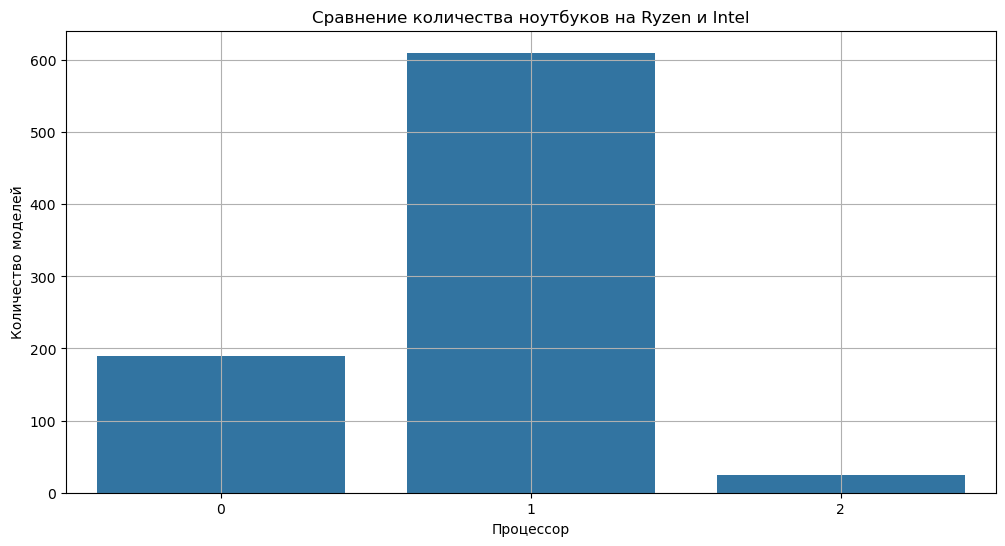

In [216]:
plt.figure(figsize=(12, 6))
pro_popularity = df_laptopPrice['processor_brand'].value_counts()
sns.barplot(x=pro_popularity.index, y=pro_popularity.values)
plt.title('Сравнение количества ноутбуков на Ryzen и Intel')
plt.xlabel('Процессор')
plt.ylabel('Количество моделей')
plt.grid()
plt.show()

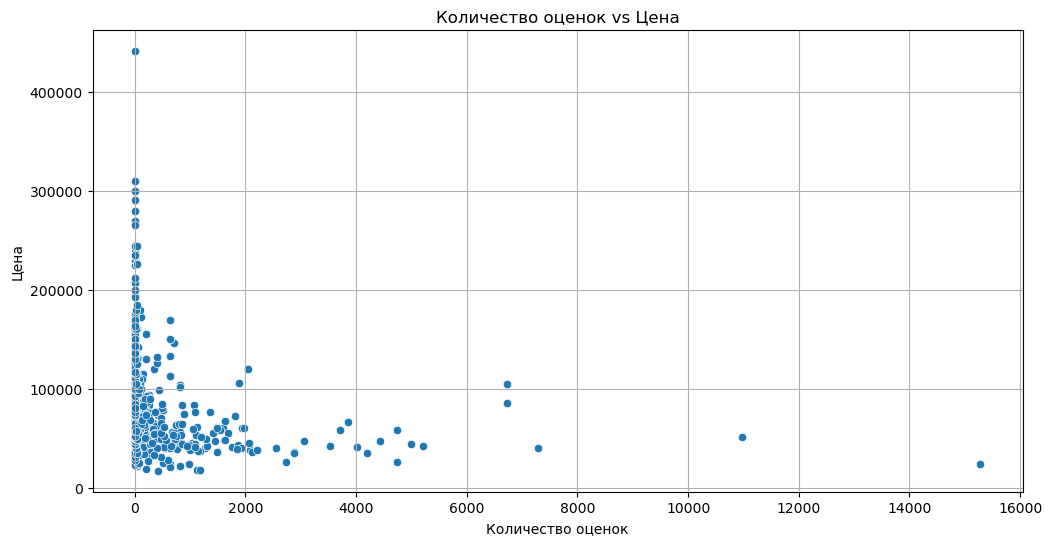

In [218]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Number of Ratings', y='Price', data=df_laptopPrice)
plt.title('Количество оценок vs Цена')
plt.xlabel('Количество оценок')
plt.ylabel('Цена')
plt.grid()
plt.show()